# Pythonで440Hzのサイン波を作成しWAVファイルに保存する

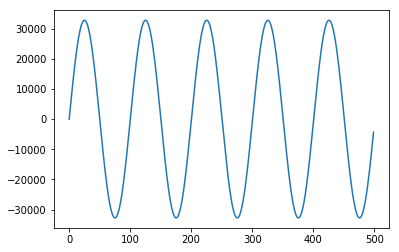

In [109]:
import numpy as np
import wave
import struct
from matplotlib import pylab as plt

fname = 'sinwave_440hz.wav'
ch = 1 # チャンネル数：モノラル
width = 2 # 量子化精度：2byte=16bit=65,536段階=±32,767
fs = 44100 # サンプリング周波数：44.1kHz
f = 440 # 基本周波数：440Hz(A4)
time = 3 # 録音時間：3秒間
samples = time * fs # サンプル数

t = np.linspace(0, time, samples + 1)
s = 32767 * np.sin(2 * np.pi * f * t)
s = np.rint(s)
s = s.astype(np.int16)
s = s[0:samples]
data = struct.pack("h" * samples , *s) # ndarrayからbytesオブジェクトに変換

wf = wave.open(fname, 'w')
wf.setnchannels(ch)
wf.setsampwidth(width)
wf.setframerate(fs)
wf.writeframes(data)
wf.close()

plt.plot(s[0:500])
plt.show()